In [1]:
import pandas as pd

In [2]:
import os
import json
import numpy as np

data = []
with open('courseCodeSubmit-20191015.json', encoding="utf8") as file:    
     data = json.load(file)
new_data=[]
for i in data.keys():
    temp=data[i]
    if "duration" in temp[0].keys():
        for j in range(len(temp)):
            new_data.append(list(temp[j].values()))
final_data=[]
for i in range(len(new_data)):
    if len(new_data[i])==18:
        final_data.append(new_data[i])
        
final_data=np.array(final_data).reshape(-1,18)
final_data=pd.DataFrame(final_data)
final_data.columns=data['Course-1565734186418'][0].keys()
final_data.head()

,_id,courseId,lessonId,exerciseId,uid,kernel,updated,error,code,codeType,status,updated_time,unit,env,submitType,exeTime,duration,_ip
0,5d1ab5d471afea5b2973b2df,Course-1561957950776,9e3a1070-3680-11e9-af86-9fcbc1471ded,6332e207-8e7c-4ad5-907c-ce5b689efae1,jimmy921009-gmail-com,airabbi,1562031572209.0,,"print(""heiip world"")",python,ExecFinished,2019/07/02 09:39:32,airabbi,fut,exec,163,763,"210.68.224.132, 210.68.224.132"
1,5d1ab5df71afea5b2973b2f9,Course-1561957950776,9e3a1070-3680-11e9-af86-9fcbc1471ded,6332e207-8e7c-4ad5-907c-ce5b689efae1,youheng331-gmail-com,airabbi,1562031583614.0,,"print(""hello world"")",python,ExecFinished,2019/07/02 09:39:43,airabbi,fut,exec,173,779,"210.68.224.132, 210.68.224.132"
2,5d1ab5e371afea5b2973b306,Course-1561957950776,9e3a1070-3680-11e9-af86-9fcbc1471ded,6332e207-8e7c-4ad5-907c-ce5b689efae1,jimmy921009-gmail-com,airabbi,1562031587578.0,,"print(""hello world"")",python,ExecFinished,2019/07/02 09:39:47,airabbi,fut,exec,167,772,"210.68.224.132, 210.68.224.132"
3,5d1ab60f71afea5b2973b347,Course-1561957950776,9e3a1070-3680-11e9-af86-9fcbc1471ded,6332e207-8e7c-4ad5-907c-ce5b689efae1,aop68067565-gmail-com,airabbi,1562031631203.0,,"print(""hello world"")",python,ExecFinished,2019/07/02 09:40:31,airabbi,fut,exec,173,786,"210.68.224.132, 210.68.224.132"
4,5d1ab68571afea5b2973b434,Course-1561957950776,9e3a1070-3680-11e9-af86-9fcbc1471ded,6332e207-8e7c-4ad5-907c-ce5b689efae1,maggie21188-gmail-com,airabbi,1562031748944.0,SyntaxError,print{hellow},python,Error,2019/07/02 09:42:28,airabbi,fut,exec,274,878,"210.68.224.132, 210.68.224.132"


In [3]:
data['Course-1565734186418'][0].keys()

dict_keys(['_id', 'courseId', 'lessonId', 'exerciseId', 'uid', 'kernel', 'updated', 'error', 'code', 'codeType', 'status', 'updated_time', 'unit', 'env', 'submitType', 'exeTime', 'duration', '_ip'])

In [4]:
final_data.shape

(6348, 18)

In [5]:
a=final_data.groupby("uid")["exerciseId"].count()
a=a[a<30]
final_data= final_data[~final_data['uid'].isin(a.index)]
final_data.shape

(6230, 18)

In [6]:
final_data.index=range(len(final_data))

In [7]:
###Status 總共有幾種
pd.unique(final_data["status"])

array(['ExecFinished', 'Error', 'TestError', 'Finished', 'UserStop',
       'SysError'], dtype=object)

In [8]:
#資料中有幾道題目
len(pd.unique(final_data["exerciseId"]))

103

In [9]:
#資料內總共有幾位學生
len(pd.unique(final_data["uid"]))

42

In [10]:
#計算正確率
def map(x):
    if x=='ExecFinished':
        return "1"
    else:
        return "0"
final_data["correct_rate"]=final_data["status"].apply(map)

In [11]:
final_data["correct_rate"].value_counts()

1    3246
0    2984
Name: correct_rate, dtype: int64

In [12]:
final_data["correct_rate"]=final_data["correct_rate"].apply(lambda x:int(x))
final_data["duration"]=final_data["duration"].apply(lambda x:int(x))

In [13]:
def is_outlier(s):
    lower_limit = s.mean() - (s.std() * 3)
    upper_limit = s.mean() + (s.std() * 3)
    return ~s.between(lower_limit, upper_limit)

In [14]:
###remove outliers in the group before aggregating
final = final_data[~final_data.groupby('exerciseId')['duration'].apply(is_outlier)]
final.shape

(6144, 19)

In [15]:
a1=final_data.pivot_table(index="exerciseId",columns="uid",aggfunc='count')
a1

_id  \
uid                                  099094-mail-fhps-tp-edu-tw   
exerciseId                                                        
0483fbf5-2222-4b86-b05d-ed726252ca55                        3.0   
067056e9-cab3-4107-89ee-fabe7fca7bf7                        NaN   
07d2687b-0111-4cba-822b-eb7f7090557b                        2.0   
0fba1d5b-485c-4637-9d5c-69f9d0c62d5d                       11.0   
10671778-37e4-4eee-b318-39afdcc178ba                        NaN   
...                                                         ...   
f32160c8-4ee3-49f6-84c2-773b1d3bd522                        NaN   
f7b8a6e4-abfb-42c9-b281-d9120c9c7af2                        3.0   
fc393883-49b4-4e6d-9613-087d48de0dae                        2.0   
fcb8ea1a-c59d-454c-9c92-79f8ea1f71df                        NaN   
fef58c85-8763-4b12-a047-812c1ba53977                        2.0   

                                                            \
uid                                  92robin1117-gmail-com   
exerciseId                                                   
0483fbf5-2222-4b86-b05d-ed726252ca55                   NaN   
067056e9-cab3-4107-89ee-fabe7fca7bf7                   NaN   
07d2687b-0111-4cba-822b-eb7f7090557b                   2.0   
0fba1d5b-485c-4637-9d5c-69f9d0c62d5d                   NaN   
10671778-37e4-4eee-b318-39afdcc178ba                   NaN   
...                                                    ...   
f32160c8-4ee3-49f6-84c2-773b1d3bd522                   NaN   
f7b8a6e4-abfb-42c9-b281-d9120c9c7af2                   NaN   
fc393883-49b4-4e6d-9613-087d48de0dae                   NaN   
fcb8ea1a-c59d-454c-9c92-79f8ea1f71df                   NaN   
fef58c85-8763-4b12-a047-812c1ba53977                   3.0   

                                                            \
uid                                  a0905561419-gmail-com   
exerciseId                                                   
0483fbf5-2222-4b86-b05d-ed726252ca55                   NaN   
067056e9-cab3-4107-89ee-fabe7fca7bf7                   NaN   
07d2687b-0111-4cba-822b-eb7f7090557b                   NaN   
0fba1d5b-485c-4637-9d5c-69f9d0c62d5d                   NaN   
10671778-37e4-4eee-b318-39afdcc178ba                   NaN   
...                                                    ...   
f32160c8-4ee3-49f6-84c2-773b1d3bd522                   NaN   
f7b8a6e4-abfb-42c9-b281-d9120c9c7af2                   NaN   
fc393883-49b4-4e6d-9613-087d48de0dae                   NaN   
fcb8ea1a-c59d-454c-9c92-79f8ea1f71df                   NaN   
fef58c85-8763-4b12-a047-812c1ba53977                   3.0   

                                                                               \
uid                                  a2359060343-gmail-com afty2948-gmail-com   
exerciseId                                                                      
0483fbf5-2222-4b86-b05d-ed726252ca55                   NaN                NaN   
067056e9-cab3-4107-89ee-fabe7fca7bf7                   2.0                2.0   
07d2687b-0111-4cba-822b-eb7f7090557b                   2.0                NaN   
0fba1d5b-485c-4637-9d5c-69f9d0c62d5d                   NaN                NaN   
10671778-37e4-4eee-b318-39afdcc178ba                   NaN                NaN   
...                                                    ...                ...   
f32160c8-4ee3-49f6-84c2-773b1d3bd522                   NaN                NaN   
f7b8a6e4-abfb-42c9-b281-d9120c9c7af2                   NaN                NaN   
fc393883-49b4-4e6d-9613-087d48de0dae                   NaN                NaN   
fcb8ea1a-c59d-454c-9c92-79f8ea1f71df                   NaN                NaN   
fef58c85-8763-4b12-a047-812c1ba53977                   2.0                3.0   

                                                            \
uid                                  aop68067565-gmail-com   
exerciseId                                                   
0483fbf5-2222-4b86-b05d-ed726252ca55                   NaN   


In [16]:
med_of_upload=a1.median(axis=1)
med_of_upload[:5]

exerciseId
0483fbf5-2222-4b86-b05d-ed726252ca55    5.0
067056e9-cab3-4107-89ee-fabe7fca7bf7    2.0
07d2687b-0111-4cba-822b-eb7f7090557b    2.0
0fba1d5b-485c-4637-9d5c-69f9d0c62d5d    9.0
10671778-37e4-4eee-b318-39afdcc178ba    2.5
dtype: float64

In [17]:
g=final.groupby('exerciseId')
result=g.agg({'correct_rate':"mean", "duration":"mean"})
result["upload_count"]=med_of_upload
result.head()

,correct_rate,duration,upload_count
exerciseId,,,
0483fbf5-2222-4b86-b05d-ed726252ca55,0.513514,3398.770270,5.0
067056e9-cab3-4107-89ee-fabe7fca7bf7,0.500000,769.136364,2.0
07d2687b-0111-4cba-822b-eb7f7090557b,0.464789,158632.950704,2.0
0fba1d5b-485c-4637-9d5c-69f9d0c62d5d,0.781250,2546.000000,9.0
10671778-37e4-4eee-b318-39afdcc178ba,0.400000,1141.600000,2.5


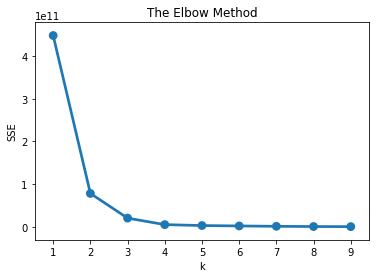

In [20]:
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(result)
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster cente
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [21]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(result)
cluster_labels = kmeans.labels_
result = result.assign(Cluster = cluster_labels)
result.head()

,correct_rate,duration,upload_count,Cluster
exerciseId,,,,
0483fbf5-2222-4b86-b05d-ed726252ca55,0.513514,3398.770270,5.0,0
067056e9-cab3-4107-89ee-fabe7fca7bf7,0.500000,769.136364,2.0,0
07d2687b-0111-4cba-822b-eb7f7090557b,0.464789,158632.950704,2.0,2
0fba1d5b-485c-4637-9d5c-69f9d0c62d5d,0.781250,2546.000000,9.0,0
10671778-37e4-4eee-b318-39afdcc178ba,0.400000,1141.600000,2.5,0


In [22]:
result.groupby(['Cluster']).agg({'correct_rate': 'mean','duration': 'median',"upload_count":"mean"})

,correct_rate,duration,upload_count
Cluster,,,
0,0.525766,3636.482143,4.315
1,0.425532,622990.478723,2.000
2,0.448394,180107.915352,2.500


In [23]:
pd.value_counts(result["Cluster"])

0    100
2      2
1      1
Name: Cluster, dtype: int64

In [24]:
di = {0:1,1:3,2:2}
result["Cluster"].replace(di, inplace=True)

In [25]:
result.head()

,correct_rate,duration,upload_count,Cluster
exerciseId,,,,
0483fbf5-2222-4b86-b05d-ed726252ca55,0.513514,3398.770270,5.0,1
067056e9-cab3-4107-89ee-fabe7fca7bf7,0.500000,769.136364,2.0,1
07d2687b-0111-4cba-822b-eb7f7090557b,0.464789,158632.950704,2.0,2
0fba1d5b-485c-4637-9d5c-69f9d0c62d5d,0.781250,2546.000000,9.0,1
10671778-37e4-4eee-b318-39afdcc178ba,0.400000,1141.600000,2.5,1


In [26]:
difficulty={}
for i in range(len(result)):
    difficulty[result.index[i]]=result["Cluster"][i]

In [27]:
#difficulty

In [28]:
temp=[]
for i in range(len(final_data)):
    if final_data["status"][i]=="ExecFinished":
        temp.append(difficulty[final_data["exerciseId"][i]])
    else:
        temp.append(0)
#temp
final_data["answer"]=temp
final_data.head()

,_id,courseId,lessonId,exerciseId,uid,kernel,updated,error,code,codeType,status,updated_time,unit,env,submitType,exeTime,duration,_ip,correct_rate,answer
0,5d1ab5d471afea5b2973b2df,Course-1561957950776,9e3a1070-3680-11e9-af86-9fcbc1471ded,6332e207-8e7c-4ad5-907c-ce5b689efae1,jimmy921009-gmail-com,airabbi,1562031572209.0,,"print(""heiip world"")",python,ExecFinished,2019/07/02 09:39:32,airabbi,fut,exec,163,763,"210.68.224.132, 210.68.224.132",1,1
1,5d1ab5df71afea5b2973b2f9,Course-1561957950776,9e3a1070-3680-11e9-af86-9fcbc1471ded,6332e207-8e7c-4ad5-907c-ce5b689efae1,youheng331-gmail-com,airabbi,1562031583614.0,,"print(""hello world"")",python,ExecFinished,2019/07/02 09:39:43,airabbi,fut,exec,173,779,"210.68.224.132, 210.68.224.132",1,1
2,5d1ab5e371afea5b2973b306,Course-1561957950776,9e3a1070-3680-11e9-af86-9fcbc1471ded,6332e207-8e7c-4ad5-907c-ce5b689efae1,jimmy921009-gmail-com,airabbi,1562031587578.0,,"print(""hello world"")",python,ExecFinished,2019/07/02 09:39:47,airabbi,fut,exec,167,772,"210.68.224.132, 210.68.224.132",1,1
3,5d1ab60f71afea5b2973b347,Course-1561957950776,9e3a1070-3680-11e9-af86-9fcbc1471ded,6332e207-8e7c-4ad5-907c-ce5b689efae1,aop68067565-gmail-com,airabbi,1562031631203.0,,"print(""hello world"")",python,ExecFinished,2019/07/02 09:40:31,airabbi,fut,exec,173,786,"210.68.224.132, 210.68.224.132",1,1
4,5d1ab68571afea5b2973b434,Course-1561957950776,9e3a1070-3680-11e9-af86-9fcbc1471ded,6332e207-8e7c-4ad5-907c-ce5b689efae1,maggie21188-gmail-com,airabbi,1562031748944.0,SyntaxError,print{hellow},python,Error,2019/07/02 09:42:28,airabbi,fut,exec,274,878,"210.68.224.132, 210.68.224.132",0,0


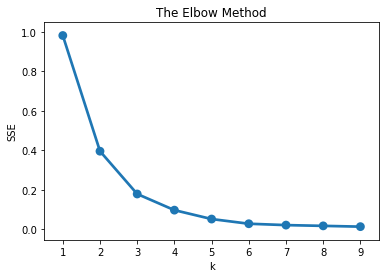

In [29]:
final_result=final_data.groupby(['uid']).agg({'answer': 'mean'})
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(final_result)
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster cente
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [30]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(final_result)
cluster_labels = kmeans.labels_
result = final_result.assign(Cluster = cluster_labels)
result.head()

,answer,Cluster
uid,,
099094-mail-fhps-tp-edu-tw,0.503012,0
92robin1117-gmail-com,0.477419,0
a0905561419-gmail-com,0.681818,1
a2359060343-gmail-com,0.389937,0
afty2948-gmail-com,0.531429,0


In [31]:
pd.value_counts(result["Cluster"])

1    17
0    17
3     5
2     3
Name: Cluster, dtype: int64

In [32]:
di = {0:'Third',1:'Second',2:'Worst',3:'Best'}
result["Cluster"].replace(di, inplace=True)

Text(0.5, 1.0, 'Student ability analysis')

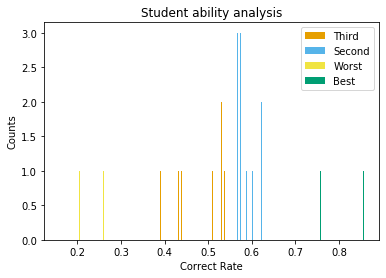

In [33]:
x1=list(result[result["Cluster"]=='Third']["answer"])
x2=list(result[result["Cluster"]=='Second']["answer"])
x3=list(result[result["Cluster"]=='Worst']["answer"])
x4=list(result[result["Cluster"]=='Best']["answer"])
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73']
names = ['Third','Second','Worst','Best']
plt.hist([x1, x2, x3, x4],bins=100,color = colors,label=names)

plt.legend()
plt.xlabel('Correct Rate')
plt.ylabel('Counts')
plt.title('Student ability analysis')

In [34]:
#了解哪門課學生表現最差
final_data.groupby("lessonId")["answer"].mean()

lessonId
9e3a1070-3680-11e9-af86-9fcbc1471ded    0.592355
9e3a3780-3680-11e9-af86-9fcbc1471ded    0.511737
9e3a5e90-3680-11e9-af86-9fcbc1471ded    0.520950
9e3a5e91-3680-11e9-af86-9fcbc1471ded    0.485294
9e3a5e92-3680-11e9-af86-9fcbc1471ded    0.375000
9e3a5e93-3680-11e9-af86-9fcbc1471ded    0.333333
Name: answer, dtype: float64

In [34]:
import scipy.stats as stats
stats.f_oneway(result[result["Cluster"]=='Third']["answer"],result[result["Cluster"]=='Best']["answer"],
              result[result["Cluster"]=='Second']["answer"],result[result["Cluster"]=='Worst']["answer"])

F_onewayResult(statistic=115.77120860082638, pvalue=3.6669781106242676e-19)

In [35]:
import pingouin as pg
aov = pg.anova(data=result, dv='answer', between='Cluster', detailed=True)
print(aov)

    Source     SS  DF     MS        F        p-unc    np2
0  Cluster  0.885   3  0.295  115.771  3.66698e-19  0.901
1   Within  0.097  38  0.003        -            -      -


In [36]:
pt = pg.pairwise_tukey(dv='answer', between='Cluster', data=result)
print(pt)

        A       B  mean(A)  mean(B)   diff     se       tail       T  p-tukey  \
0    Best  Second    0.803    0.623  0.180  0.028  two-sided   6.476    0.001   
1    Best   Third    0.803    0.466  0.337  0.028  two-sided  12.092    0.001   
2    Best   Worst    0.803    0.206  0.597  0.040  two-sided  14.931    0.001   
3  Second   Third    0.623    0.466  0.156  0.019  two-sided   8.330    0.001   
4  Second   Worst    0.623    0.206  0.417  0.034  two-sided  12.151    0.001   
5   Third   Worst    0.466    0.206  0.260  0.034  two-sided   7.589    0.001   

   hedges  
0   3.170  
1   5.918  
2   9.482  
3   2.790  
4   7.288  
5   4.551  


資料中總共有幾道題目:  103
資料中總共有幾位學生:  42


不同群間的學生程度差異(單位:平均加權正確率)
           answer
Cluster          
Worst    0.205956
Third    0.466243
Second   0.622730
Best     0.803192


了解哪門課學生表現最差(用該門課學生答題正確率來計算)
lessonId
9e3a1070-3680-11e9-af86-9fcbc1471ded    0.592355
9e3a3780-3680-11e9-af86-9fcbc1471ded    0.511737
9e3a5e90-3680-11e9-af86-9fcbc1471ded    0.520950
9e3a5e91-3680-11e9-af86-9fcbc1471ded    0.485294
9e3a5e92-3680-11e9-af86-9fcbc1471ded    0.375000
9e3a5e93-3680-11e9-af86-9fcbc1471ded    0.333333
Name: answer, dtype: float64




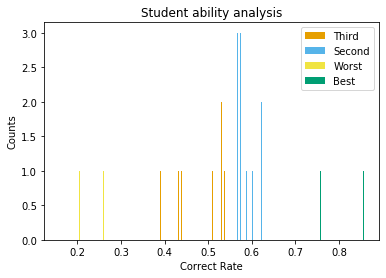

In [35]:
if __name__ == '__main__':
    data = []
    with open('data.json', encoding="utf8") as file:    
         data = json.load(file)
    new_data=[]
    for i in data.keys():
        temp=data[i]
        if "duration" in temp[0].keys():
            for j in range(len(temp)):
                new_data.append(list(temp[j].values()))
    final_data=[]
    for i in range(len(new_data)):
        if len(new_data[i])==18:
            final_data.append(new_data[i])
        
    final_data=np.array(final_data).reshape(-1,18)
    final_data=pd.DataFrame(final_data)
    final_data.columns=['_id', 'courseId', 'lessonId', 'exerciseId', 'uid', 'kernel', 'updated', 'error', 'code', 'codeType', 'status', 'updated_time', 'unit', 'env', 'submitType', 'exeTime', 'duration', '_ip']
    a=final_data.groupby("uid")["exerciseId"].count()
    a=a[a<30]
    final_data= final_data[~final_data['uid'].isin(a.index)]
    final_data.index=range(len(final_data))
    print("資料中總共有幾道題目: ",len(pd.unique(final_data["exerciseId"])))
    print("資料中總共有幾位學生: ",len(pd.unique(final_data["uid"])))
    print("\n")
    final_data["correct_rate"]=final_data["status"].apply(map)
    final_data["correct_rate"]=final_data["correct_rate"].apply(lambda x:int(x))
    final_data["duration"]=final_data["duration"].apply(lambda x:int(x))
    final = final_data[~final_data.groupby('exerciseId')['duration'].apply(is_outlier)]
    a1=final_data.pivot_table(index="exerciseId",columns="uid",aggfunc='count')
    med_of_upload=a1.median(axis=1)
    g=final.groupby('exerciseId')
    result=g.agg({'correct_rate':"mean", "duration":"mean"})
    result["upload_count"]=med_of_upload
    kmeans = KMeans(n_clusters=3, random_state=1)
    kmeans.fit(result)
    cluster_labels = kmeans.labels_
    result = result.assign(Cluster = cluster_labels)
    di = {0:1,1:3,2:2}
    result["Cluster"].replace(di, inplace=True)
    a1=result.reset_index()[["exerciseId","Cluster"]]
    a1.set_index("exerciseId")
    a1.to_csv('exercise_difficulty_Result.csv')
    difficulty={}
    for i in range(len(result)):
        difficulty[result.index[i]]=result["Cluster"][i]
    temp=[]
    for i in range(len(final_data)):
        if final_data["status"][i]=="ExecFinished":
            temp.append(difficulty[final_data["exerciseId"][i]])
        else:
            temp.append(0)
    final_data["answer"]=temp
    final_result=final_data.groupby(['uid']).agg({'answer': 'mean'})
    kmeans = KMeans(n_clusters=4, random_state=1)
    kmeans.fit(final_result)
    cluster_labels = kmeans.labels_
    result = final_result.assign(Cluster = cluster_labels)
    di = {0:'Third',1:'Second',2:'Worst',3:'Best'}
    result["Cluster"].replace(di, inplace=True)
    print("不同群間的學生程度差異(單位:平均加權正確率)")
    print(result.groupby(['Cluster']).agg({'answer': 'mean'}).sort_values(by="answer"))

    print("\n")
    x1=list(result[result["Cluster"]=='Third']["answer"])
    x2=list(result[result["Cluster"]=='Second']["answer"])
    x3=list(result[result["Cluster"]=='Worst']["answer"])
    x4=list(result[result["Cluster"]=='Best']["answer"])
    colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73']
    names = ['Third','Second','Worst','Best']
    plt.hist([x1, x2, x3, x4],bins=100,color = colors,label=names)
    
    plt.legend()
    plt.xlabel('Correct Rate')
    plt.ylabel('Counts')
    plt.title('Student ability analysis')
    
    plt.savefig("Student ability analysis.png")
    result.reset_index()[["uid","Cluster"]].set_index("uid").to_csv('Student_ability_Result.csv')
    print("了解哪門課學生表現最差(用該門課學生答題正確率來計算)")
    print(final_data.groupby("lessonId")["answer"].mean())
    print("\n") 